In [1]:
from train_model import *

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
models = {
    # '0409_env6_3res_1_3_5': '1_3_5',
    # '0409_env6_1res_1': '1',
    # '0409_env6_1res_3': '3',    
    # '0409_env6_1res_5': '5',

    # '0405_env16_3res': '1_5_16',
    # '0410_env16_1res_1': '1',
    # '0410_env16_1res_5': '5',
    # '0409_env16_1res': '16',
    # '0410_env16_1res_16_v2': '16',
    # '0410_env32_1res': '32'

    # '0418_env20_1res_1': '1',
    # '0419_env20_1res_3': '3',
    # '0418_env20_1res_5': '5',
    # '0418_env20_1res_10': '10',
    # '0418_env20_1res_20': '20',
    # '0419_env20_3res_1_3_5': '1_3_5',
    # '0422_env20_2res_1_10': '1_10',
    # '0422_env20_4res_1_3_5_10': '1_3_5_10',
    # '0418_env20_4res': '1_5_10_20',
    # '0419_env20_5res': '1_3_5_10_20'

    # '0409_env6_1res_1': '1',
    # '0416_env6_1res_1_autoencoder': '1_autoencoder',
    # '0409_env6_1res_5': '5',
    # '0416_env6_1res_5_autoencoder': '5_autoencoder'

    # '0425_sat128_1res_resnet_bs1024': '250m',
    # '0426_sat128_1res_25': '630m',
    # '0426_sat128_1res_52': '1250m',
    # '0430_sat18_3res': '3res_bs256!!'

    # '0501_sat128_1res_25_bs256': '250m',
    # '0501_sat128_1res_63_bs256': '630m',
    # '0501_sat128_1res_125_bs256': '1250m',
    # '0501_sat128_3res_2174_bs256': '3res'

    # '0510_env3res': 'env_3res',
    # '0510_sat3res': 'sat_3res',
    # '0510_multimodel_multires': 'env_3res_sat_3res'

    # '0604_env1_1': 'env1_1',
    # '0604_env1_10': 'env1_10',
    # '0604_env1_1_other_n_filters': 'env1_1_other_n_filter',
    # '0605_env1_1_yet_other_n_filters': 'env1_1_yet_other_n_fliter',
    # '0605_env1_1_train_set_only_val_species': 'env1_1_train_on_val_species',
    # '0604_sat25_25': 'sat25_25',
    # '0604_sat25_128': 'sat25_128'

    # '0615_env_1_patchsize_5': 'env_1_ps5',
    # '0612_env_3': 'env_3',
    # '0613_env_5_2convs3x3': 'env_5 (2*3convs)',
    # '0611_env13_no_dilated_convs': 'env_13',
    # '0614_env_1_3_9_17': 'env_1_3_9_17',
    # '0615_env_1_3_9': 'env_1_3_9',
    # '0615_env_1_3_5': 'env_1_3_5'

    # '0618_env_1': 'env_1',
    # '0612_env_5': 'env_5',
    # '0612_env_9': 'env_9',
    # '0612_env_17': 'env_17',
    # '0612_env_25': 'env_25',
    # '0619_env_1_5': 'env_1_5',
    # '0619_env_1_5_9': 'env_1_5_9',
    # '0619_env_1_5_9_17': 'env_1_5_9_17',
    # '0619_env_1_5_9_17_25': 'env_1_5_9_17_25',
    # '0619_env_5_9_17_25': 'env_5_9_17_25',

    '0702_env_1': 'env_1',
    '0702_env_5': 'env_5',
    '0702_env_9': 'env_9',
    '0702_env_17': 'env_17',
    '0702_env_25': 'env_25',
    '0702_env_1_5': 'env_1_5',
    '0702_env_1_5_9': 'env_1_5_9',
    '0702_env_1_5_9_17': 'env_1_5_9_17',
    '0702_env_1_5_9_17_25': 'env_1_5_9_17_25',

    # '0623_env_1_out_2048': 'env_1_out_2048',
    # '0623_env_5_out_2048': 'env_5_out_2048',
    # '0623_env_9_out_2048': 'env_9_out_2048',
    # '0623_env_17_out_2048': 'env_17_out_2048',
    # '0623_env_25_out_2048': 'env_25_out_2048',
    # '0623_env_1_5_9_out_2048': 'env_1_5_9_out_2048',
    
    '0702_sat_25': 'sat_25',
    '0702_sat_59': 'sat_59',
    '0702_sat_115': 'sat_115',
    '0702_sat_25_59_115': 'sat_25_59_115',

    '0701_env_1_sat_25': 'env_1_sat_25',
    '0703_env_1_sat_59': 'env_1_sat_59',
    '0703_env_1_sat_115': 'env_1_sat_115',
    '0701_env_1_sat_25_59_115_v2': 'env_1_sat_25_59_115',
    '0701_env_1_5_sat_25_59_115': 'env_1_5_sat_25_59_115',
    '0701_env_1_5_9_17_sat_25_59_115': 'env_1_5_9_17_sat_25_59_115'

}
checkpoint =  'best_val_auc' # 'last' #
auc_df = pd.concat([
    pd.read_csv(f"models/{k}/{checkpoint}_species_auc.csv").rename(columns={"auc": v}).set_index(['species','n_occ']) for k, v in models.items()
], axis=1)

auc_df

,,env_1,env_5,env_9,env_17,env_25,env_1_5,env_1_5_9,env_1_5_9_17,env_1_5_9_17_25,sat_25,sat_59,sat_115,sat_25_59_115,env_1_sat_25,env_1_sat_59,env_1_sat_115,env_1_sat_25_59_115,env_1_5_sat_25_59_115,env_1_5_9_17_sat_25_59_115
species,n_occ,,,,,,,,,,,,,,,,,,,
1,2261,0.716835,0.701502,0.863797,0.982739,0.868415,0.797265,0.839767,0.860480,0.879175,0.921677,0.913472,0.810491,0.891325,0.918583,0.848689,0.821834,0.831428,0.890697,0.851423
5,4529,0.498778,0.539274,0.429697,0.485780,0.598070,0.594010,0.514528,0.481190,0.516770,0.540977,0.655836,0.630879,0.635247,0.584927,0.541083,0.474677,0.545961,0.507216,0.508919
10,2162,0.926167,0.907144,0.929288,0.927512,0.844827,0.927405,0.906068,0.916750,0.903296,0.959935,0.926382,0.927566,0.943092,0.946751,0.924499,0.921943,0.933674,0.920086,0.921997
11,4508,0.736671,0.757606,0.705025,0.718330,0.664441,0.670595,0.664900,0.740257,0.753380,0.716861,0.748851,0.639354,0.664610,0.731467,0.766632,0.669065,0.677221,0.776163,0.725563
24,4539,0.817955,0.824603,0.830609,0.826939,0.673557,0.820358,0.818389,0.812571,0.815643,0.657698,0.678448,0.702247,0.656777,0.796087,0.825425,0.810467,0.817655,0.835771,0.826897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,204,0.918852,0.956377,0.989868,0.895315,0.838332,0.989375,0.984802,0.992827,0.891011,0.943107,0.971666,0.931406,0.927236,0.961713,0.926833,0.924636,0.962206,0.964716,0.919749
10031,20,0.037515,0.633723,0.792793,0.403254,0.880463,0.508135,0.683743,0.577518,0.473309,0.840258,0.887858,0.907893,0.961409,0.719376,0.719242,0.548070,0.707274,0.686702,0.815383
10035,110,0.478691,0.513831,0.462422,0.506118,0.392579,0.380688,0.436494,0.434751,0.474624,0.460952,0.429450,0.604419,0.494872,0.463116,0.493743,0.512471,0.476396,0.508151,0.483562


In [4]:
pa_path = get_path_to("pa", "glc23", datadir)
print(pa_path)
n_occ_val = pd.read_csv(pa_path, sep=";", header='infer', low_memory=False).groupby('speciesId')['patchID'].count() # GLC23
n_occ_val = n_occ_val.reset_index().rename(columns={'speciesId':'species','patchID':'n_val'})
auc_df = auc_df.reset_index().merge(n_occ_val, on='species').set_index(['species','n_occ','n_val'])
auc_df

data/GLC23/Presence_Absence_surveys/Presences_Absences_train.csv


,,,env_1,env_5,env_9,env_17,env_25,env_1_5,env_1_5_9,env_1_5_9_17,env_1_5_9_17_25,sat_25,sat_59,sat_115,sat_25_59_115,env_1_sat_25,env_1_sat_59,env_1_sat_115,env_1_sat_25_59_115,env_1_5_sat_25_59_115,env_1_5_9_17_sat_25_59_115
species,n_occ,n_val,,,,,,,,,,,,,,,,,,,
1,2261,3,0.716835,0.701502,0.863797,0.982739,0.868415,0.797265,0.839767,0.860480,0.879175,0.921677,0.913472,0.810491,0.891325,0.918583,0.848689,0.821834,0.831428,0.890697,0.851423
5,4529,14,0.498778,0.539274,0.429697,0.485780,0.598070,0.594010,0.514528,0.481190,0.516770,0.540977,0.655836,0.630879,0.635247,0.584927,0.541083,0.474677,0.545961,0.507216,0.508919
10,2162,5,0.926167,0.907144,0.929288,0.927512,0.844827,0.927405,0.906068,0.916750,0.903296,0.959935,0.926382,0.927566,0.943092,0.946751,0.924499,0.921943,0.933674,0.920086,0.921997
11,4508,20,0.736671,0.757606,0.705025,0.718330,0.664441,0.670595,0.664900,0.740257,0.753380,0.716861,0.748851,0.639354,0.664610,0.731467,0.766632,0.669065,0.677221,0.776163,0.725563
24,4539,588,0.817955,0.824603,0.830609,0.826939,0.673557,0.820358,0.818389,0.812571,0.815643,0.657698,0.678448,0.702247,0.656777,0.796087,0.825425,0.810467,0.817655,0.835771,0.826897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,204,3,0.918852,0.956377,0.989868,0.895315,0.838332,0.989375,0.984802,0.992827,0.891011,0.943107,0.971666,0.931406,0.927236,0.961713,0.926833,0.924636,0.962206,0.964716,0.919749
10031,20,1,0.037515,0.633723,0.792793,0.403254,0.880463,0.508135,0.683743,0.577518,0.473309,0.840258,0.887858,0.907893,0.961409,0.719376,0.719242,0.548070,0.707274,0.686702,0.815383
10035,110,16,0.478691,0.513831,0.462422,0.506118,0.392579,0.380688,0.436494,0.434751,0.474624,0.460952,0.429450,0.604419,0.494872,0.463116,0.493743,0.512471,0.476396,0.508151,0.483562


In [5]:
for run_name in models.keys():
        f1s = np.load(f"models/{run_name}/f1_scores_best_val_auc.npy")
        # print(f"*** {run_name} ***")
        # print(f"\t {f1s[:,f1s[1].argmax()].round(4)}")
        print(f"{run_name} 0.5 {f1s[1,np.argwhere((f1s[0] < 0.52) & (f1s[0] > 0.48))].round(4)}")

        # checkpoint = torch.load(f"{modeldir}{run_name}/best_val_auc.pth")
        # epoch = checkpoint['epoch']+1 
        # auc = checkpoint['val_auc']
        # print(f"(epoch {epoch}) AUC = {auc}, {f1s[:,f1s[1].argmax()].round(4)}, 0.5 {f1s[1,np.argwhere((f1s[0] < 0.52) & (f1s[0] > 0.48))].round(4)}")

0702_env_1 0.5 [[0.0293]]
0702_env_5 0.5 [[0.0268]]
0702_env_9 0.5 [[0.0292]]
0702_env_17 0.5 [[0.0262]]
0702_env_25 0.5 [[0.0186]]
0702_env_1_5 0.5 [[0.0297]]
0702_env_1_5_9 0.5 [[0.0285]]
0702_env_1_5_9_17 0.5 [[0.0276]]
0702_env_1_5_9_17_25 0.5 [[0.0269]]
0702_sat_25 0.5 [[0.021]]
0702_sat_59 0.5 [[0.0321]]
0702_sat_115 0.5 [[0.0254]]
0702_sat_25_59_115 0.5 [[0.0297]]
0701_env_1_sat_25 0.5 [[0.0389]]
0703_env_1_sat_59 0.5 [[0.0352]]
0703_env_1_sat_115 0.5 [[0.0338]]
0701_env_1_sat_25_59_115_v2 0.5 [[0.0325]]
0701_env_1_5_sat_25_59_115 0.5 [[0.032]]
0701_env_1_5_9_17_sat_25_59_115 0.5 [[0.0378]]


In [6]:
auc_df.median().round(4)

env_1                         0.8751
env_5                         0.8722
env_9                         0.8689
env_17                        0.8635
env_25                        0.8048
env_1_5                       0.8738
env_1_5_9                     0.8738
env_1_5_9_17                  0.8734
env_1_5_9_17_25               0.8696
sat_25                        0.8143
sat_59                        0.8162
sat_115                       0.8178
sat_25_59_115                 0.8213
env_1_sat_25                  0.8949
env_1_sat_59                  0.8865
env_1_sat_115                 0.8863
env_1_sat_25_59_115           0.8908
env_1_5_sat_25_59_115         0.8854
env_1_5_9_17_sat_25_59_115    0.8865
dtype: float64

In [8]:
auc_df.reset_index()[auc_df.reset_index().n_val > 2].set_index(['species','n_occ','n_val']).median()

env_1                         0.853755
env_5                         0.851666
env_9                         0.851050
env_17                        0.852452
env_25                        0.767996
env_1_5                       0.857379
env_1_5_9                     0.855346
env_1_5_9_17                  0.853682
env_1_5_9_17_25               0.853427
sat_25                        0.799367
sat_59                        0.804492
sat_115                       0.796653
sat_25_59_115                 0.801674
env_1_sat_25                  0.872637
env_1_sat_59                  0.867080
env_1_sat_115                 0.869886
env_1_sat_25_59_115           0.871221
env_1_5_sat_25_59_115         0.866487
env_1_5_9_17_sat_25_59_115    0.864609
dtype: float64

In [9]:
auc_df.reset_index()[auc_df.reset_index().n_val <= 2].set_index(['species','n_occ','n_val']).median()

env_1                         0.912666
env_5                         0.912520
env_9                         0.903792
env_17                        0.899220
env_25                        0.846456
env_1_5                       0.908923
env_1_5_9                     0.912924
env_1_5_9_17                  0.916431
env_1_5_9_17_25               0.910582
sat_25                        0.861485
sat_59                        0.867066
sat_115                       0.874260
sat_25_59_115                 0.862579
env_1_sat_25                  0.932634
env_1_sat_59                  0.925430
env_1_sat_115                 0.924835
env_1_sat_25_59_115           0.932231
env_1_5_sat_25_59_115         0.928466
env_1_5_9_17_sat_25_59_115    0.930944
dtype: float64

In [9]:
from scipy.stats import gaussian_kde

In [138]:
delta_auc_env = auc_df[['env_1','env_1_5']].reset_index()
delta_auc_env['delta_auc'] = delta_auc_env['env_1']-delta_auc_env['env_1_5']

values = np.vstack([delta_auc_env['n_val'], delta_auc_env['delta_auc']])
kernel = gaussian_kde(values)(values)
kernel_norm_env = (kernel - kernel.min()) / (kernel.max() - kernel.min())

values1 = np.vstack([delta_auc_env['n_val'], delta_auc_env['env_1']])
kernel1 = gaussian_kde(values1)(values1)
kernel_norm_env_1 = (kernel1 - kernel1.min()) / (kernel1.max() - kernel1.min())

delta_auc_env

,species,n_occ,n_val,env_1,env_1_5,delta_auc
0,1,2261,3,0.716835,0.797265,-0.080430
1,5,4529,14,0.498778,0.594010,-0.095232
2,10,2162,5,0.926167,0.927405,-0.001238
3,11,4508,20,0.736671,0.670595,0.066076
4,24,4539,588,0.817955,0.820358,-0.002402
...,...,...,...,...,...,...
2169,10028,204,3,0.918852,0.989375,-0.070522
2170,10031,20,1,0.037515,0.508135,-0.470620
2171,10035,110,16,0.478691,0.380688,0.098003
2172,10038,10,1,0.980100,0.964771,0.015329


In [124]:
print(delta_auc_env[abs(delta_auc_env.delta_auc)>0.1].shape[0] / delta_auc_env.shape[0])
print(delta_auc_env[abs(delta_auc_env.delta_auc)>0.2].shape[0] / delta_auc_env.shape[0])
print(delta_auc_env[abs(delta_auc_env.delta_auc)>0.1].env_1.median())
print(delta_auc_env[abs(delta_auc_env.delta_auc)>0.1].env_1_5.median())
print(delta_auc_env[abs(delta_auc_env.delta_auc)>0.1].n_val.median())


0.10809567617295308
0.027598896044158234
0.6275887573964497
0.6744102139778325
3.0


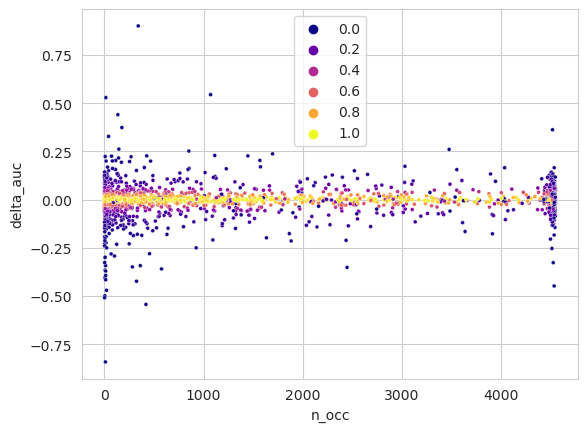

In [211]:
ax = sns.scatterplot(delta_auc_env, x='n_occ', y='delta_auc', hue=kernel_norm_env, s=8, palette='plasma')
# ax.set_xlim(0, 100)

(0.0, 100.0)

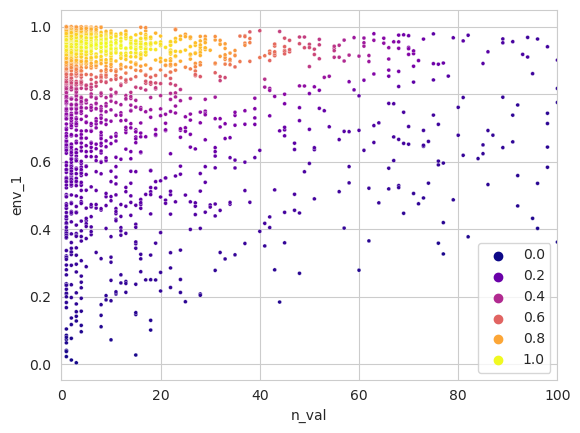

In [142]:
ax = sns.scatterplot(delta_auc_env, x='n_val', y='env_1', hue=kernel_norm_env_1, s=8, palette='plasma')
ax.set_xlim(0, 100)

In [102]:
auc_df

,,,env_1,env_5,env_9,env_17,env_25,env_1_5,env_1_5_9,env_1_5_9_17,env_1_5_9_17_25,sat_25,sat_59,sat_115,sat_25_59_115,env_1_sat_25,env_1_sat_59,env_1_sat_115,env_1_sat_25_59_115,env_1_5_sat_25_59_115,env_1_5_9_17_sat_25_59_115
species,n_occ,n_val,,,,,,,,,,,,,,,,,,,
1,2261,3,0.716835,0.701502,0.863797,0.982739,0.868415,0.797265,0.839767,0.860480,0.879175,0.921677,0.913472,0.810491,0.891325,0.918583,0.848689,0.821834,0.831428,0.890697,0.851423
5,4529,14,0.498778,0.539274,0.429697,0.485780,0.598070,0.594010,0.514528,0.481190,0.516770,0.540977,0.655836,0.630879,0.635247,0.584927,0.541083,0.474677,0.545961,0.507216,0.508919
10,2162,5,0.926167,0.907144,0.929288,0.927512,0.844827,0.927405,0.906068,0.916750,0.903296,0.959935,0.926382,0.927566,0.943092,0.946751,0.924499,0.921943,0.933674,0.920086,0.921997
11,4508,20,0.736671,0.757606,0.705025,0.718330,0.664441,0.670595,0.664900,0.740257,0.753380,0.716861,0.748851,0.639354,0.664610,0.731467,0.766632,0.669065,0.677221,0.776163,0.725563
24,4539,588,0.817955,0.824603,0.830609,0.826939,0.673557,0.820358,0.818389,0.812571,0.815643,0.657698,0.678448,0.702247,0.656777,0.796087,0.825425,0.810467,0.817655,0.835771,0.826897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,204,3,0.918852,0.956377,0.989868,0.895315,0.838332,0.989375,0.984802,0.992827,0.891011,0.943107,0.971666,0.931406,0.927236,0.961713,0.926833,0.924636,0.962206,0.964716,0.919749
10031,20,1,0.037515,0.633723,0.792793,0.403254,0.880463,0.508135,0.683743,0.577518,0.473309,0.840258,0.887858,0.907893,0.961409,0.719376,0.719242,0.548070,0.707274,0.686702,0.815383
10035,110,16,0.478691,0.513831,0.462422,0.506118,0.392579,0.380688,0.436494,0.434751,0.474624,0.460952,0.429450,0.604419,0.494872,0.463116,0.493743,0.512471,0.476396,0.508151,0.483562


In [189]:
delta_auc_sat = auc_df[['sat_59','sat_25_59_115']].reset_index()
delta_auc_sat['delta_auc'] = delta_auc_sat['sat_59']-delta_auc_sat['sat_25_59_115']

values = np.vstack([delta_auc_sat['n_val'], delta_auc_sat['delta_auc']])
kernel = gaussian_kde(values)(values)
kernel_norm_sat = (kernel - kernel.min()) / (kernel.max() - kernel.min())

values59 = np.vstack([delta_auc_sat['n_val'], delta_auc_sat['sat_59']])
kernel59 = gaussian_kde(values59)(values59)
kernel_norm_sat_59 = (kernel59 - kernel59.min()) / (kernel59.max() - kernel59.min())

delta_auc_sat

,species,n_occ,n_val,sat_59,sat_25_59_115,delta_auc
0,1,2261,3,0.913472,0.891325,0.022148
1,5,4529,14,0.655836,0.635247,0.020590
2,10,2162,5,0.926382,0.943092,-0.016709
3,11,4508,20,0.748851,0.664610,0.084241
4,24,4539,588,0.678448,0.656777,0.021671
...,...,...,...,...,...,...
2169,10028,204,3,0.971666,0.927236,0.044430
2170,10031,20,1,0.887858,0.961409,-0.073551
2171,10035,110,16,0.429450,0.494872,-0.065422
2172,10038,10,1,0.820627,0.898346,-0.077720


In [190]:
print(delta_auc_sat[abs(delta_auc_sat.delta_auc)>0.1].shape[0] / delta_auc_sat.shape[0])
print(delta_auc_sat[abs(delta_auc_sat.delta_auc)>0.2].shape[0] / delta_auc_sat.shape[0])
print(delta_auc_sat[abs(delta_auc_sat.delta_auc)>0.1].sat_59.median())
print(delta_auc_sat[abs(delta_auc_sat.delta_auc)>0.1].sat_25_59_115.median())
print(delta_auc_sat[abs(delta_auc_sat.delta_auc)>0.1].n_val.median())


0.1688132474701012
0.05795768169273229
0.6613098440021516
0.6668235610543303
2.0


(0.0, 100.0)

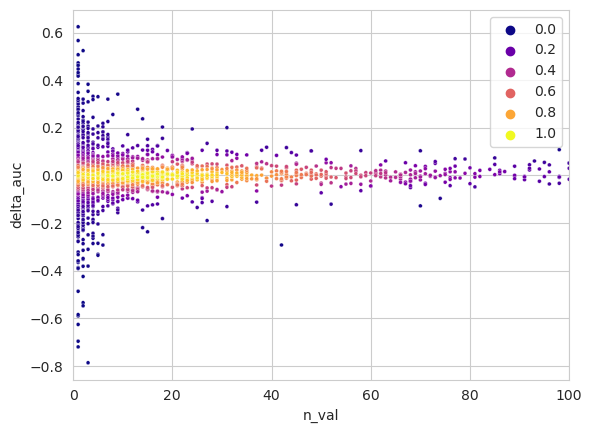

In [210]:
ax = sns.scatterplot(delta_auc_sat, x='n_val', y='delta_auc', hue=kernel_norm_sat, s=8, palette='plasma')
ax.set_xlim(0, 100)

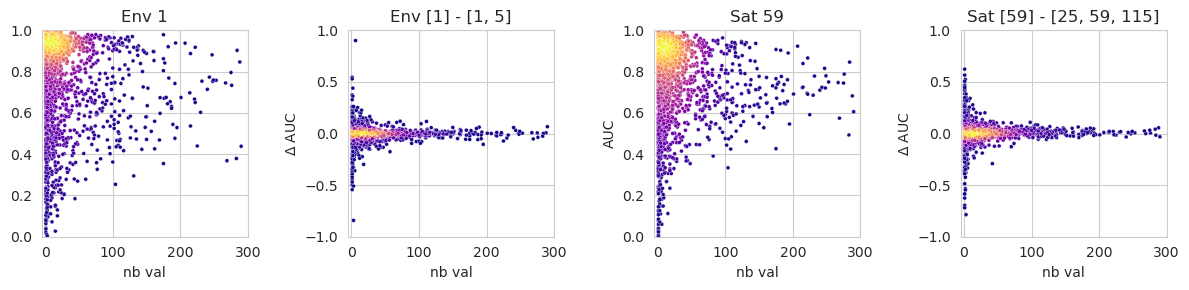

In [208]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(12,3))

sns.scatterplot(delta_auc_env, ax=ax1, x='n_val', y='env_1', hue=kernel_norm_env_1, s=8, palette='plasma')
ax1.set(title='Env 1', ylabel="", ylim=(0,1))

sns.scatterplot(delta_auc_env, ax=ax2, x='n_val', y='delta_auc', hue=kernel_norm_env, s=8, palette='plasma')
ax2.set(title='Env [1] - [1, 5]', xlabel='nb val', ylabel="$\Delta$ AUC", ylim=(-1,1))

sns.scatterplot(delta_auc_sat, ax=ax3, x='n_val', y='sat_59', hue=kernel_norm_sat_59, s=8, palette='plasma')
ax3.set(title='Sat 59', xlabel='nb val', ylabel='AUC', ylim=(0,1))

sns.scatterplot(delta_auc_sat, ax=ax4, x='n_val', y='delta_auc', hue=kernel_norm_sat, s=8, palette='plasma')
ax4.set(title='Sat [59] - [25, 59, 115]', xlabel='nb val', ylabel="$\Delta$ AUC", ylim=(-1,1))

for ax in (ax1, ax2, ax3, ax4):
    ax.legend([],[], frameon=False)
    ax.set(xlabel='nb val', xlim=(-5, 300))

plt.tight_layout()

In [189]:
plot_df = auc_df[[
    'env_1', 'env_1_5', 'env_1_5_9']].copy()
plot_df['max_delta_auc'] = auc_df.max(axis=1)-auc_df.min(axis=1)
plot_df['max_auc'] = auc_df.max(axis=1)
plot_df = pd.melt(plot_df.reset_index(), id_vars=['species','n_occ','n_val','max_delta_auc','max_auc'], var_name='model', value_name='AUC')
plot_df['n_occ_cat'] = plot_df['n_occ'].apply(lambda n: '1-100' if n <= 100 else ('101-750' if n <= 750 else ('751-3500' if n <= 3500 else '3551-4548')))
plot_df['n_val_cat'] = plot_df['n_val'].apply(lambda n: '1-2' if n <= 2 else ('3-8' if n <= 8 else ('9-25' if n <= 25 else '26-1925')))
plot_df

,species,n_occ,n_val,max_delta_auc,max_auc,model,AUC,n_occ_cat,n_val_cat
0,1,2261,3,0.281237,0.982739,env_1,0.716835,751-3500,3-8
1,5,4529,14,0.226139,0.655836,env_1,0.498778,3551-4548,9-25
2,10,2162,5,0.115108,0.959935,env_1,0.926167,751-3500,3-8
3,11,4508,20,0.136809,0.776163,env_1,0.736671,3551-4548,9-25
4,24,4539,588,0.178994,0.835771,env_1,0.817955,3551-4548,26-1925
...,...,...,...,...,...,...,...,...,...
6517,10028,204,3,0.154495,0.992827,env_1_5_9,0.984802,101-750,3-8
6518,10031,20,1,0.923894,0.961409,env_1_5_9,0.683743,1-100,1-2
6519,10035,110,16,0.223731,0.604419,env_1_5_9,0.436494,101-750,9-25
6520,10038,10,1,0.317736,0.996773,env_1_5_9,0.955896,1-100,1-2


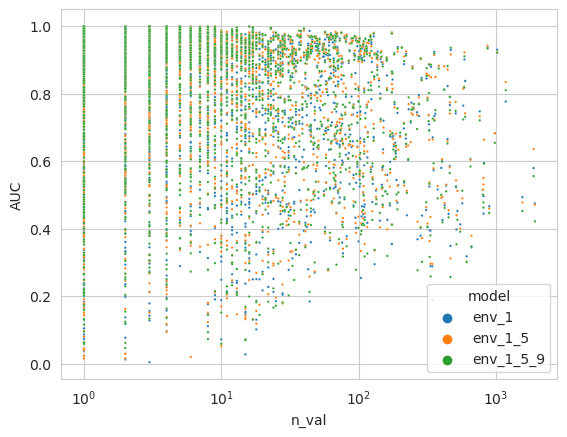

In [195]:
sns.set_style('whitegrid')
sns.scatterplot(plot_df, x='n_val', y='AUC', hue='model', s=3)
plt.xscale('log')

In [200]:
plot_delta_df = pd.DataFrame({
    'delta_auc_1_5': auc_df['env_1'] - auc_df['env_1_5'],
    'delta_auc_1_5_9': auc_df['env_1'] - auc_df['env_1_5_9']
}, index=auc_df.index)
plot_delta_df = pd.melt(plot_delta_df.reset_index(), id_vars=['species','n_occ','n_val'], var_name='model', value_name='delta_AUC')
plot_delta_df

,species,n_occ,n_val,model,delta_AUC
0,1,2261,3,delta_auc_1_5,-0.080430
1,5,4529,14,delta_auc_1_5,-0.095232
2,10,2162,5,delta_auc_1_5,-0.001238
3,11,4508,20,delta_auc_1_5,0.066076
4,24,4539,588,delta_auc_1_5,-0.002402
...,...,...,...,...,...
4343,10028,204,3,delta_auc_1_5_9,-0.065949
4344,10031,20,1,delta_auc_1_5_9,-0.646228
4345,10035,110,16,delta_auc_1_5_9,0.042197
4346,10038,10,1,delta_auc_1_5_9,0.024203


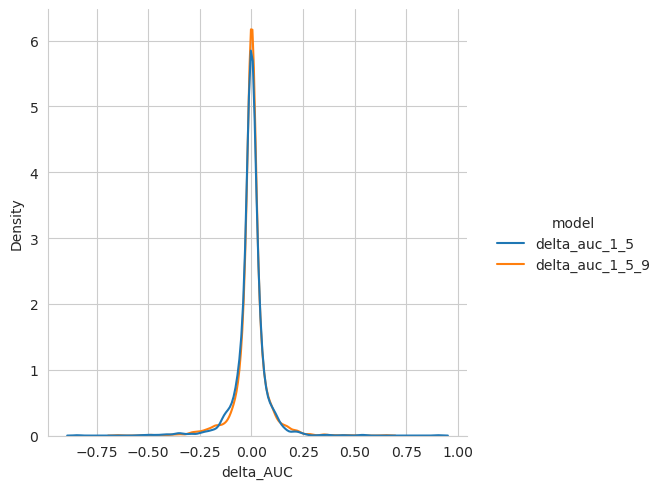

In [202]:
sns.displot(plot_delta_df, x='delta_AUC', hue='model', kind='kde')

<AxesSubplot: xlabel='n_occ', ylabel='delta_AUC'>

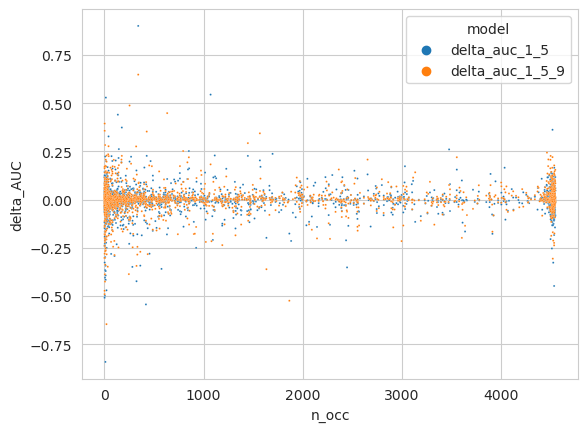

In [209]:
sns.scatterplot(plot_delta_df, x='n_occ', y='delta_AUC', hue='model', s=2)

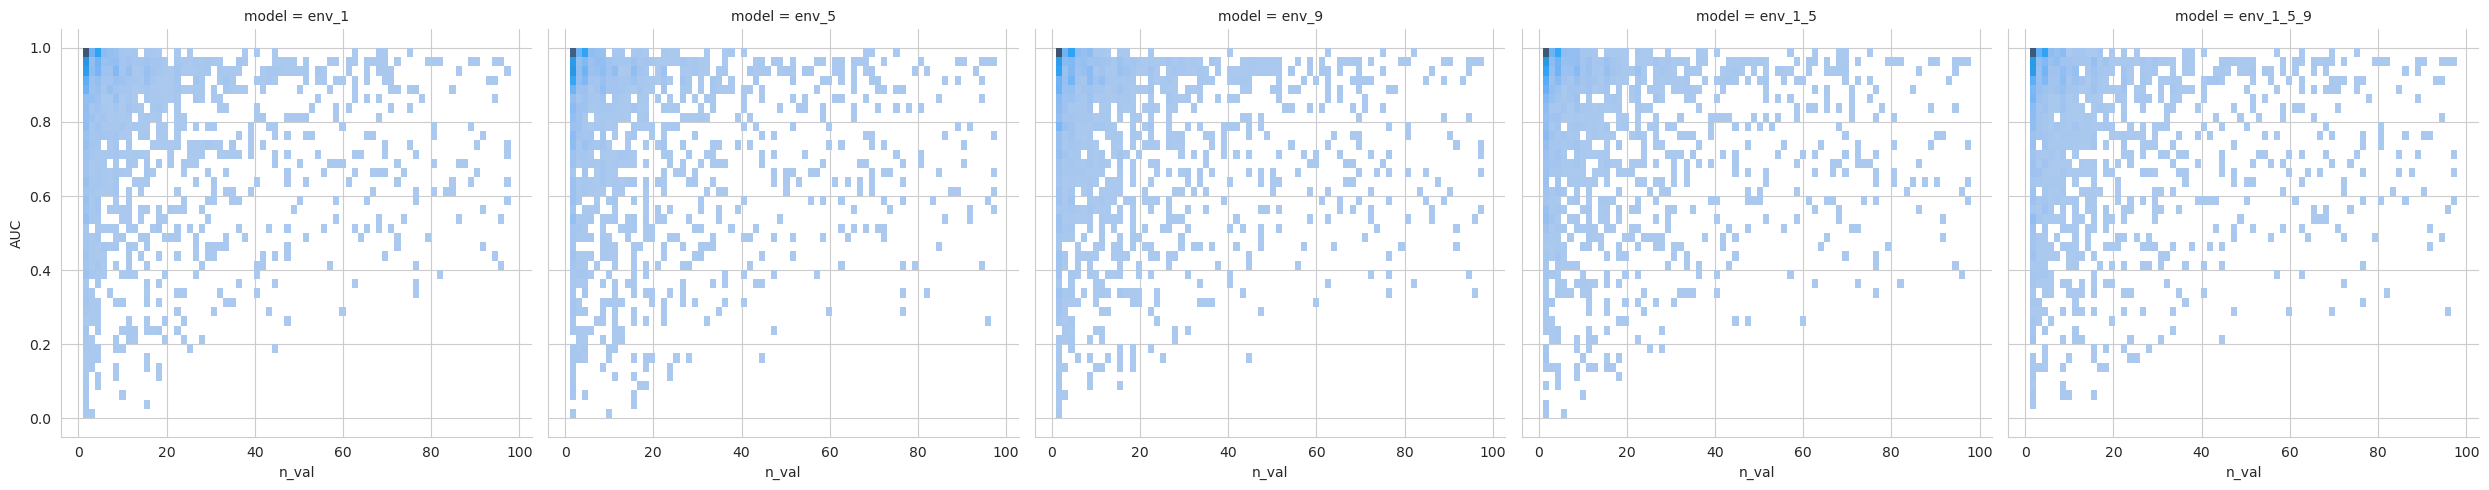

In [181]:
sns.displot(plot_df[plot_df.n_val < 100], x= 'n_val', y='AUC', col='model')
# plt.xscale('log')

In [186]:
tmp = plot_df[['species','n_occ','n_val','max_delta_auc','max_auc']].drop_duplicates()
tmp

,species,n_occ,n_val,max_delta_auc,max_auc
0,1,2261,3,0.281237,0.982739
1,5,4529,14,0.226139,0.655836
2,10,2162,5,0.115108,0.959935
3,11,4508,20,0.136809,0.776163
4,24,4539,588,0.178994,0.835771
...,...,...,...,...,...
2169,10028,204,3,0.154495,0.992827
2170,10031,20,1,0.923894,0.961409
2171,10035,110,16,0.223731,0.604419
2172,10038,10,1,0.317736,0.996773


<AxesSubplot: xlabel='max_delta_auc', ylabel='Count'>

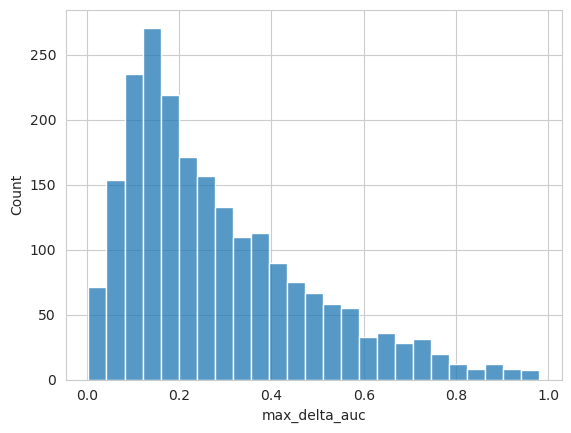

In [188]:
sns.histplot(tmp, x='max_delta_auc')

<AxesSubplot: xlabel='n_val', ylabel='max_delta_auc'>

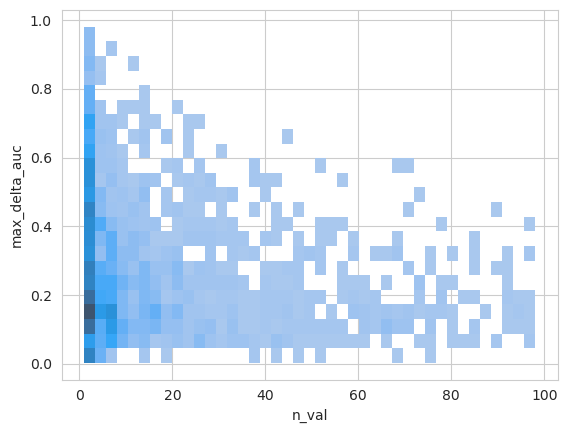

In [182]:
sns.histplot(plot_df[plot_df.n_val < 100].drop_duplicates('species'), x= 'n_val', y='max_delta_auc')


<AxesSubplot: xlabel='n_occ', ylabel='max_delta_auc'>

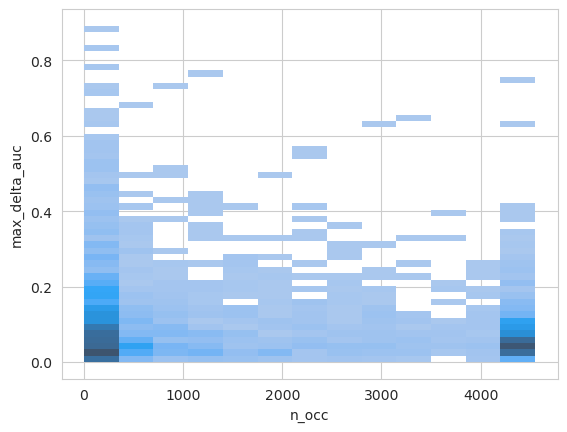

In [143]:
sns.histplot(plot_df.drop_duplicates('species'), x= 'n_occ', y='max_delta_auc')
# plt.xscale('log')

In [95]:
# sns.pointplot(plot_df[plot_df.species.isin(plot_df.species.sample(100))], x='n_val', y='AUC', hue='species')

In [90]:
auc_df.columns

Index(['env_1', 'env_5', 'env_9', 'env_17', 'env_25', 'env_1_5', 'env_1_5_9',
       'env_1_5_9_17', 'env_1_5_9_17_25', 'sat_25', 'sat_59', 'sat_115',
       'sat_25_59_115'],
      dtype='object')

In [131]:
auc_df

,,,sat_25,sat_59,sat_115,sat_25_59_115
species,n_occ,n_val,,,,
1,2261,3,0.921677,0.913472,0.810491,0.891325
5,4529,14,0.540977,0.655836,0.630879,0.635247
10,2162,5,0.959935,0.926382,0.927566,0.943092
11,4508,20,0.716861,0.748851,0.639354,0.664610
24,4539,588,0.657698,0.678448,0.702247,0.656777
...,...,...,...,...,...,...
10028,204,3,0.943107,0.971666,0.931406,0.927236
10031,20,1,0.840258,0.887858,0.907893,0.961409
10035,110,16,0.460952,0.429450,0.604419,0.494872


In [133]:
auc_df.reset_index()[auc_df.reset_index().n_val <= 8].set_index(['species','n_occ','n_val'])

,,,sat_25,sat_59,sat_115,sat_25_59_115
species,n_occ,n_val,,,,
1,2261,3,0.921677,0.913472,0.810491,0.891325
10,2162,5,0.959935,0.926382,0.927566,0.943092
28,632,2,0.052978,0.218099,0.368697,0.026220
33,1305,5,0.761254,0.850558,0.961227,0.903350
55,631,4,0.856168,0.889797,0.965698,0.873218
...,...,...,...,...,...,...
10024,156,3,0.970903,0.973459,0.981618,0.969827
10025,620,7,0.398427,0.234270,0.144645,0.326951
10028,204,3,0.943107,0.971666,0.931406,0.927236


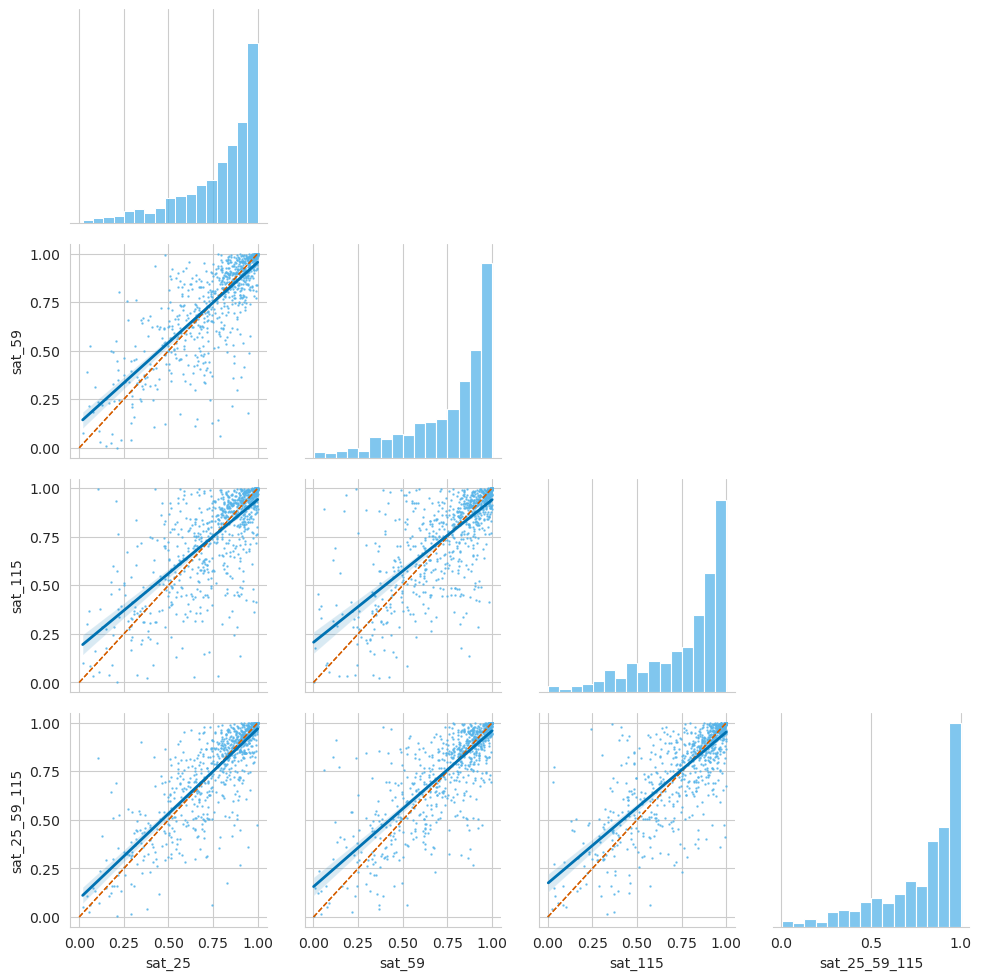

In [134]:
g = sns.PairGrid(auc_df.reset_index()[auc_df.reset_index().n_val <= 4].set_index(['species','n_occ','n_val']), diag_sharey=True, corner=True, aspect=1)

def plot_unity(xdata, ydata, **kwargs):
    points = np.linspace((0,0), (1,1), 100)
    plt.gca().plot(points, points, color='#D55E00', marker=None,
            linestyle='--', linewidth=1.0)
g.map_offdiag(plot_unity)
g.map_offdiag(sns.regplot, scatter_kws=dict(s=0.5, color="#56B4E9"), line_kws=dict(color="#0072B2", linewidth=2))

g.map_diag(sns.histplot, color="#56B4E9")

desired_ticks = [0, 0.25, 0.5, 0.75, 1]
for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    ax = g.axes[i, j]
    ax.set_xticks(desired_ticks)
    ax.set_yticks(desired_ticks)

In [68]:
auc_df

,,env_1,env_5,env_9,env_17,env_25,env_1_5,env_1_5_9,env_1_5_9_17,sat_25,sat_59,sat_115,sat_25_59_115
species,n_occ,,,,,,,,,,,,
1,2261,0.716835,0.701502,0.863797,0.982739,0.868415,0.797265,0.839767,0.860480,0.921677,0.913472,0.810491,0.891325
5,4529,0.498778,0.539274,0.429697,0.485780,0.598070,0.594010,0.514528,0.481190,0.540977,0.655836,0.630879,0.635247
10,2162,0.926167,0.907144,0.929288,0.927512,0.844827,0.927405,0.906068,0.916750,0.959935,0.926382,0.927566,0.943092
11,4508,0.736671,0.757606,0.705025,0.718330,0.664441,0.670595,0.664900,0.740257,0.716861,0.748851,0.639354,0.664610
24,4539,0.817955,0.824603,0.830609,0.826939,0.673557,0.820358,0.818389,0.812571,0.657698,0.678448,0.702247,0.656777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,204,0.918852,0.956377,0.989868,0.895315,0.838332,0.989375,0.984802,0.992827,0.943107,0.971666,0.931406,0.927236
10031,20,0.037515,0.633723,0.792793,0.403254,0.880463,0.508135,0.683743,0.577518,0.840258,0.887858,0.907893,0.961409
10035,110,0.478691,0.513831,0.462422,0.506118,0.392579,0.380688,0.436494,0.434751,0.460952,0.429450,0.604419,0.494872


In [96]:
# sns.pointplot(plot_df[plot_df['species']< 500], y='AUC', x='median_auc', hue='species', estimator='median', errorbar=(lambda x: (x.min(), x.max())))

In [107]:
rank_df = auc_df.rank(axis=1, method='min', ascending=False)
rank_df

,,,sat_25,sat_59,sat_115,sat_25_59_115
species,n_occ,n_val,,,,
1,2261,3,1.0,2.0,4.0,3.0
5,4529,14,4.0,1.0,3.0,2.0
10,2162,5,1.0,4.0,3.0,2.0
11,4508,20,2.0,1.0,4.0,3.0
24,4539,588,3.0,2.0,1.0,4.0
...,...,...,...,...,...,...
10028,204,3,2.0,1.0,3.0,4.0
10031,20,1,4.0,3.0,2.0,1.0
10035,110,16,3.0,4.0,1.0,2.0


In [108]:
top_1_and_top_3 = pd.concat([
    pd.DataFrame({
        "percent_species": (rank_df == 1).sum(axis=0) / auc_df.shape[0] * 100,
        "median_AUC": auc_df[rank_df == 1].median(),
        "top-k": 1
    }),
    #     pd.DataFrame({
    #     "percent_species": (rank_df <=3).sum(axis=0) / auc_df.shape[0] * 100,
    #     "median_AUC": auc_df[rank_df <=3].median(),
    #     "top-k": 3
    # })
]).reset_index(names='model')
top_1_and_top_3

,model,percent_species,median_AUC,top-k
0,sat_25,21.757130,0.838824,1
1,sat_59,28.472861,0.824513,1
2,sat_115,27.046918,0.884246,1
3,sat_25_59_115,22.953082,0.916642,1


/tmp/ipykernel_22305/2976063310.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.scatterplot(top_1_and_top_3, x='model', y='median_AUC', hue='top-k', size='percent_species', sizes=(50,500), palette=['#377eb8','#ff7f00'])
/tmp/ipykernel_22305/2976063310.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


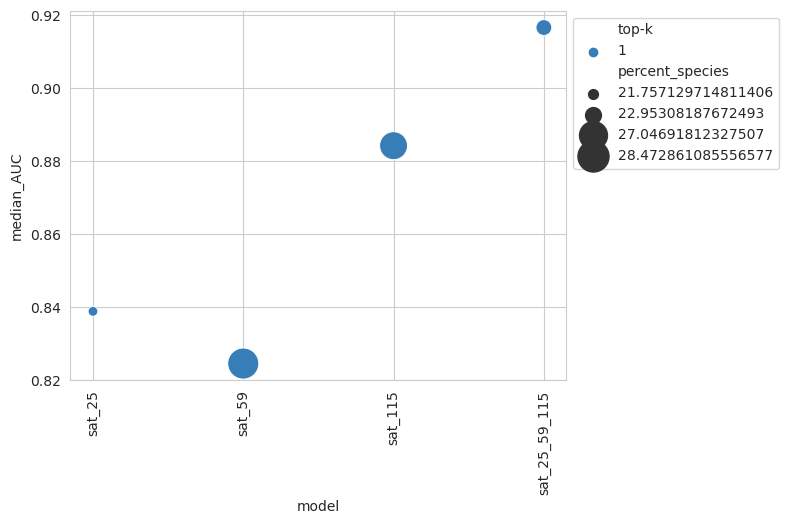

In [109]:
ax = sns.scatterplot(top_1_and_top_3, x='model', y='median_AUC', hue='top-k', size='percent_species', sizes=(50,500), palette=['#377eb8','#ff7f00'])
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

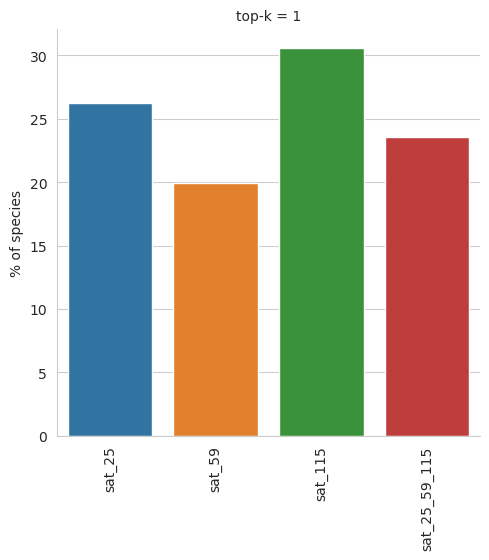

In [195]:
sns.set_style('whitegrid')
ax = sns.catplot(top_1_and_top_3, kind='bar', col='top-k', x='model', y='percent_species', sharey=False)
ax.set(xlabel='', ylabel="% of species")
ax.set_xticklabels(rotation=90)

In [34]:
y_pred = np.load('models/0618_env_1/y_pred_best_val_auc.npy')
labels = np.load('models/0618_env_1/y_true.npy')
print(y_pred.shape, labels.shape)

(7438, 2174) (7438, 2174)


In [35]:
y_bin = np.where(y_pred > 0.5, 1, 0)

In [37]:
from sklearn.metrics import f1_score

In [54]:
y_bin = np.zeros(y_pred.shape)

for s in range(y_pred.shape[1]):
    sps_pred = y_pred[:,s]
    sps_labels = labels[:,s]

    sps_f1s = []
    thresholds = np.arange(0, 1, 0.1)
    for thresh in thresholds:
        sps_f1s.append(f1_score(sps_labels, np.where(sps_pred > thresh, 1, 0)))
    sps_thresh = thresholds[np.argmax(sps_f1s)]

    y_bin[:,s] = np.where(sps_pred > sps_thresh, 1, 0)

In [56]:
f1_score(labels.T, y_bin.T, average='macro', zero_division=0)

0.026781131164215308

In [38]:
f1_score(labels.T, y_bin.T, average='macro', zero_division=0)

0.029276996603776043

In [14]:
pred[0,:].argsort()[-30:]

array([1690, 1113, 1426, 1879, 1644, 1129,  245, 1430, 1432,  754,  228,
       1198,  301,  310,  620,  385, 1599,  230,  645, 1516,   78, 1146,
        788, 1542,  295, 2054, 1981, 1285,  455, 1844])

In [18]:
np.nonzero(true[0,:])

(array([  61,   65,  142,  435,  669,  799,  805,  831,  851,  875,  978,
        1134, 1202, 1221, 1373, 1752, 1933, 1940, 2158]),)

In [24]:
true.sum(axis=1).mean()

11.335036

<AxesSubplot: >

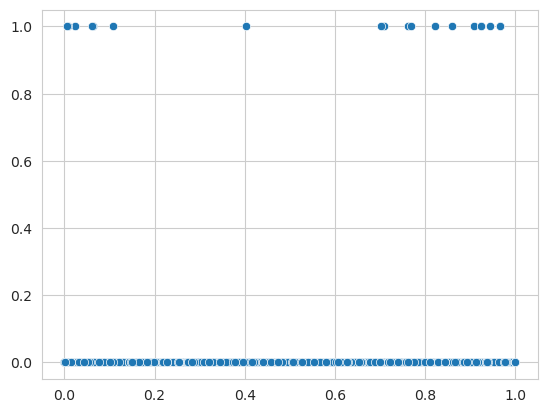

In [103]:
sns.scatterplot(x=pred[0,:], y=true[0,:])

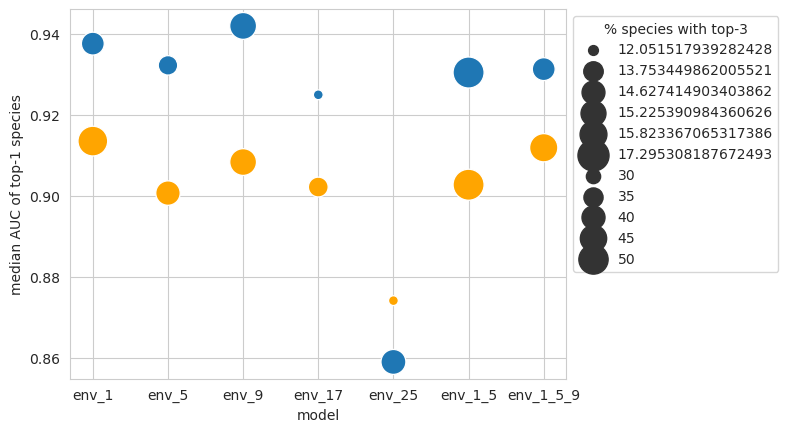

In [189]:
ax = sns.scatterplot(percent_species_with_rank.reset_index(names='model'), x='model', y='median AUC of top-1 species', size='% species with top-1', sizes=(50, 500))#pointplot to it scat
ax = sns.scatterplot(percent_species_with_rank.reset_index(names='model'), x='model', y='median AUC of top-3 species', size='% species with top-3', sizes=(50, 500), color='orange')#pointplot to it scat
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [138]:
tmp = pd.melt(auc_df[rank_df == 1].reset_index(), id_vars=['species','n_occ'], var_name='model', value_name='AUC').dropna()
tmp

,species,n_occ,model,AUC
14,101,246,env_1,0.999597
18,119,74,env_1,0.955003
20,124,7,env_1,0.961370
24,135,2,env_1,0.827034
31,159,291,env_1,0.951657
...,...,...,...,...
15186,9878,1034,env_1_5_9,0.952461
15188,9885,847,env_1_5_9,0.958126
15193,9911,364,env_1_5_9,0.983728
15194,9920,3902,env_1_5_9,0.999933


/home/nina/miniconda3/envs/glc23/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


<AxesSubplot: xlabel='model', ylabel='AUC'>

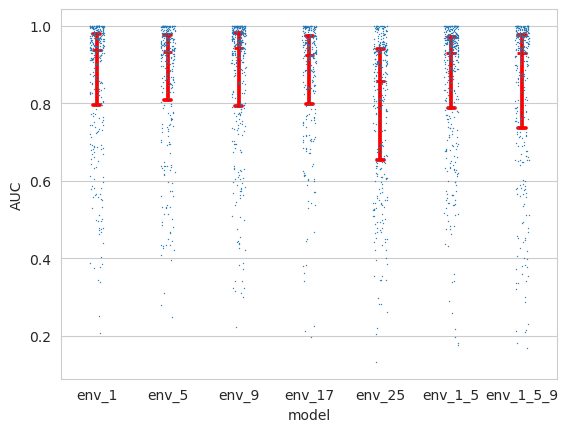

In [183]:
sns.stripplot(tmp, x='model', y='AUC', dodge=True, alpha=0.9, s=1)
sns.pointplot(tmp, x='model', y='AUC', linestyles="none", estimator="median", errorbar=('pi', 50), capsize = 0.1, markers='_', color='red')

<AxesSubplot: xlabel='model', ylabel='AUC'>

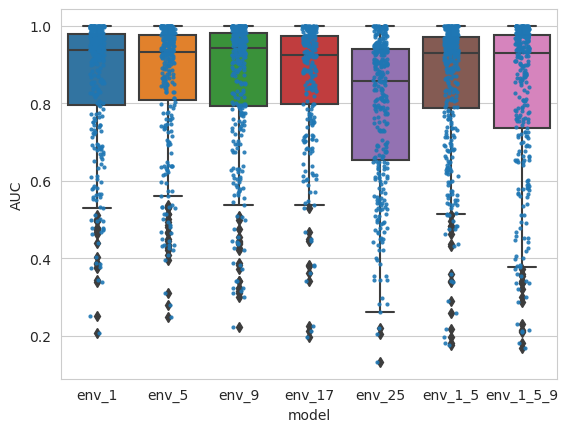

In [185]:
sns.stripplot(tmp, x='model', y='AUC', dodge=True, alpha=0.9, s=3)
sns.boxplot(tmp, x='model', y='AUC')

In [25]:
run_name = '0527_glc24_env_1_val_france'
path_to_config = f"{modeldir}{run_name}/config.json"
with open(path_to_config, "r") as f: 
    config = json.load(f)
config = {k: v if v != "" else None for k,v in config.items()}

log_wandb = config['log_wandb']
wandb_project = config['wandb_project']
wandb_id = config['wandb_id']
env_model = config['env_model']
sat_model = config['sat_model']
dataset = config['dataset']
random_bg = config['random_bg']
n_max_low_occ = config['n_max_low_occ']
embed_shape = config['embed_shape']
loss = config['loss']
lambda2 = config['lambda2']
n_epochs = config['n_epochs']
batch_size = config['batch_size']
learning_rate = config['learning_rate']
weight_decay = config['weight_decay']
num_workers_train = config['num_workers_train']
num_workers_val = config['num_workers_val']
seed = config['seed']

In [26]:
seed_everything(seed)
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"DEVICE: {dev}")

train_data, val_data, model, optimizer, multimodal, autoencoder = setup_model(
    env_model=env_model,
    sat_model=sat_model,
    dataset=dataset,
    random_bg=random_bg,
    n_max_low_occ=n_max_low_occ,
    embed_shape=embed_shape, 
    learning_rate=learning_rate, 
    weight_decay=weight_decay,
    seed=seed) 
model = model.to(dev)

DEVICE: cuda

Making patch providers with size=10x10, flatten=False for covariates:
	 - data/GLC24/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/
	 - data/GLC24/EnvironmentalRasters/Soilgrids/
	 - data/GLC24/EnvironmentalRasters/LandCover/LandCover_MODIS_Terra-Aqua_500m.tif

Making patch providers with size=10x10, flatten=False for covariates:
	 - data/GLC24/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/
	 - data/GLC24/EnvironmentalRasters/Soilgrids/
	 - data/GLC24/EnvironmentalRasters/LandCover/LandCover_MODIS_Terra-Aqua_500m.tif

Making dataset for training occurrences
nb items = 3894962
input shape: [(41, 10, 10)]

Making dataset for validation occurrences
nb items = 88987

Making model


In [27]:
val_loader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=batch_size, num_workers=num_workers_val)

In [28]:
checkpoint = torch.load(f"{modeldir}{run_name}/last.pth")
start_epoch = checkpoint['epoch'] + 1
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [42]:
model.eval()
labels_list, y_pred_list = [], []
for inputs, _, labels in tqdm(val_loader):
    labels = labels.to(torch.float32).to(dev) 
    labels_list.append(labels.cpu().detach().numpy())

    inputs = inputs[0].to(torch.float32).to(dev)
    y_pred = torch.sigmoid(model(inputs))

    y_pred_list.append(y_pred.cpu().detach().numpy())
      
labels = np.concatenate(labels_list)
y_pred = np.concatenate(y_pred_list)

# validation AUC

# auc = roc_auc_score(labels, y_pred)
# print(auc)

100%|██████████| 348/348 [00:10<00:00, 33.86it/s]


In [43]:
labels = labels[:, val_data.species_pred_in_data]
y_pred = y_pred[:, val_data.species_pred_in_data]

In [45]:
print(labels.shape, y_pred.shape)

(88987, 4367) (88987, 4367)


In [36]:
from torcheval.metrics.functional import binary_auroc

In [52]:
pred_torch = torch.from_numpy(y_pred.T)
labels_torch = torch.from_numpy(labels.T)
print(pred_torch.shape, labels_torch.shape)

torch.Size([4367, 88987]) torch.Size([4367, 88987])


In [57]:
labels_torch.shape[0]

4367

In [54]:
start = time.time()
auc = binary_auroc(pred_torch, labels_torch, num_tasks=4367)
end = time.time()
print(auc.mean())
print(end-start)

tensor(0.8514, dtype=torch.float64)
9.726004838943481


In [61]:
auc.median().item()#cpu().detach().number()

0.9502361038433524

In [51]:
labels_filter = labels[:, :100]
y_pred_filter = y_pred[:, :100]
start = time.time()
auc = roc_auc_score(labels_filter, y_pred_filter)
end = time.time()
print(auc)
print(end-start)

0.8317704038395496
20.06242036819458


In [14]:
auc_df.reset_index()[auc_df.reset_index()['species'].isin(n_occ_val[n_occ_val >= 5].index)][auc_df.reset_index()['n_occ'] <= 50].mean()

/tmp/ipykernel_810942/820455611.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  auc_df.reset_index()[auc_df.reset_index()['species'].isin(n_occ_val[n_occ_val >= 5].index)][auc_df.reset_index()['n_occ'] <= 50].mean()


species              4883.902062
n_occ                  16.329897
env_3res                0.773105
sat_3res                0.788907
env_3res_sat_3res       0.859192
dtype: float64

In [2]:
from train_model import *

In [3]:
run_name = '0527_glc24_env_1'
path_to_config = modeldir + run_name + '/config.json'
with open(path_to_config, "r") as f:
    config = json.load(f)
config = {k: v if v != "" else None for k,v in config.items()}
log_wandb = config['log_wandb']
wandb_project = config['wandb_project']
wandb_id = config['wandb_id']
env_model = config['env_model']
sat_model = config['sat_model']
dataset = config['dataset']
random_bg = config['random_bg']
n_max_low_occ = config['n_max_low_occ']
embed_shape = config['embed_shape']
loss = config['loss']
lambda2 = config['lambda2']
n_epochs = config['n_epochs']
batch_size = config['batch_size']
learning_rate = config['learning_rate']
weight_decay = config['weight_decay']
num_workers_train = config['num_workers_train']
num_workers_val = config['num_workers_val']
seed = config['seed']
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
train_data, val_data, model, optimizer, multimodal, autoencoder = setup_model(
    env_model=env_model,
    sat_model=sat_model,
    dataset=dataset,
    random_bg=random_bg,
    n_max_low_occ=n_max_low_occ,
    embed_shape=embed_shape, 
    learning_rate=learning_rate, 
    weight_decay=weight_decay,
    seed=seed) 
model = model.to(dev)


Making patch providers with size=10x10, flatten=False for covariates:
	 - data/glc24_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/
	 - data/glc24_data/EnvironmentalRasters/Soilgrids/
	 - data/glc24_data/EnvironmentalRasters/LandCover/LandCover_MODIS_Terra-Aqua_500m.tif

Making patch providers with size=10x10, flatten=False for covariates:
	 - data/glc24_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/
	 - data/glc24_data/EnvironmentalRasters/Soilgrids/
	 - data/glc24_data/EnvironmentalRasters/LandCover/LandCover_MODIS_Terra-Aqua_500m.tif

Making dataset for training occurrences
nb items = 3894962
nb species = 9709
input shape: [(41, 10, 10)]

Making dataset for validation occurrences
nb items = 88987
nb species = 9709

Making model


NameError: name 'dev' is not defined

In [5]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(dev)

In [6]:
val_loader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=batch_size, num_workers=num_workers_val)

In [7]:
labels_list = []
for inputs, _, labels in tqdm(val_loader):
    labels = labels.to(torch.float32).to(dev) 
    labels_list.append(labels.cpu().detach().numpy())
labels = np.concatenate(labels_list)

100%|██████████| 348/348 [00:08<00:00, 42.28it/s]


In [8]:
labels.shape

(88987, 9709)

In [11]:
labels.sum(axis=0).shape

(9709,)

In [43]:
np.sum(labels.sum(axis=0) == 0)

5342

In [26]:
species_to_select = [s in val_data.species_counts.index for s in val_data.species]

In [27]:
labels[:,species_to_select].shape

(88987, 4367)

In [44]:
np.sum(labels[:,species_to_select].sum(axis=0) == 0)

0

In [17]:
train_data.species_counts

0.0         67
1.0          1
2.0        248
4.0          1
5.0         42
          ... 
11248.0     12
11250.0     13
11252.0     12
11253.0     23
11254.0      4
Length: 9709, dtype: int64

In [4]:
loss_fn = eval(loss)
species_weights = torch.tensor(train_data.species_weights).to(dev)
val_loss_fn = torch.nn.BCELoss()

In [5]:
checkpoint = torch.load(f"{modeldir}{run_name}/best_val_auc.pth")
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch'] + 1
max_val_auc = checkpoint['val_auc']
print(epoch, max_val_auc)

26 0.8193423272756075


In [8]:
# evaluate model on validation set
model.eval()
val_loss_list, val_classif_loss_list, val_reconstr_loss_list, labels_list, y_pred_list = [], [], [], [], []
for inputs, _, labels in tqdm(val_loader):
    labels = labels.to(torch.float32).to(dev) 
    labels_list.append(labels.cpu().detach().numpy())

    if multimodal:
        inputsA = inputs[0].to(torch.float32).to(dev)
        inputsB = inputs[1].to(torch.float32).to(dev)
        y_pred = torch.sigmoid(model(inputsA, inputsB))
    else:
        inputs = inputs[0].to(torch.float32).to(dev)
        y_pred = torch.sigmoid(model(inputs))

    y_pred_list.append(y_pred.cpu().detach().numpy())

labels = np.concatenate(labels_list)
y_pred = np.concatenate(y_pred_list)

  0%|          | 0/30 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 23.69 GiB total capacity; 22.79 GiB already allocated; 275.94 MiB free; 23.02 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
np.save(f"{modeldir}{run_name}/y_pred_best_val_auc.pth", y_pred)
np.save(f"{modeldir}{run_name}/y_true.pth", labels)

In [ ]:

        # validation AUC
        auc = roc_auc_score(labels, y_pred)
        auc_low_occ = roc_auc_score(labels[:, train_data.low_occ_species_idx], y_pred[:, train_data.low_occ_species_idx])

        # if autoencoder:
        #     avg_val_classif_loss = np.mean(val_classif_loss_list)
        #     avg_val_reconstr_loss = np.mean(val_reconstr_loss_list, axis=0)
        #     print(f"\tVALIDATION LOSS={avg_val_loss} (classification loss={avg_val_classif_loss}, reconstruction loss={avg_val_reconstr_loss}) \nVALIDATION AUC={auc}")
        # else:
        print(f"\tVALIDATION LOSS={avg_val_loss} \nVALIDATION AUC={auc}")

        df = pd.DataFrame(train_data.species_counts, columns=['n_occ']).reset_index().rename(columns={'index':'species'})
        df['auc'] = [roc_auc_score(labels[:,i], y_pred[:,i]) for i in range(labels.shape[1])]
        df.to_csv(f"{modeldir}{run_name}/last_species_auc.csv", index=False)

        if log_wandb:
            wandb.log({"train_loss": avg_train_loss, "val_loss": avg_val_loss, "val_auc": auc, "val_auc_low_occ": auc_low_occ})
            # if autoencoder:
            #     wandb.log({"train_total_loss": avg_train_loss, "val_total_loss": avg_val_loss})
            #     if len(avg_train_reconstr_loss) == 1:
            #         wandb.log({"train_reconstr_loss_1": avg_train_reconstr_loss[0], "val_reconstr_loss_1": avg_val_reconstr_loss[0]})
            #     elif len(avg_train_reconstr_loss) == 3:
            #         wandb.log({
            #             "train_reconstr_loss_1": avg_train_reconstr_loss[0], "train_reconstr_loss_2": avg_train_reconstr_loss[1], "train_reconstr_loss_3": avg_train_reconstr_loss[2],
            #             "val_reconstr_loss_1": avg_val_reconstr_loss[0], "val_reconstr_loss_2": avg_val_reconstr_loss[1], "val_reconstr_loss_3": avg_val_reconstr_loss[2]
            #         })
            #     else:
            #         print('cannot log reconstruction losses!')

        # model checkpoint
        torch.save({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': avg_train_loss,
            'val_loss': avg_val_loss,
            'val_auc': auc
        }, f"{modeldir}/{run_name}/last.pth") 

        # save best model
        if auc > max_val_auc:
            max_val_auc = auc
            df.to_csv(f"{modeldir}{run_name}/best_val_auc_species_auc.csv", index=False)
            torch.save({
                'epoch': epoch,
                'state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
                'val_auc': auc
            }, f"{modeldir}{run_name}/best_val_auc.pth")  

    

# run_name = '0510_multimodel_multires'
# path_to_config = f"{modeldir}{run_name}/config.json"
# with open(path_to_config, "r") as f: 
#     config = json.load(f)
# config = {k: v if v != "" else None for k,v in config.items()}
# model_setup = {}

# if config['env_model'] is not None: 
#     config['env_model']['covariates'] = [eval(f) for f in config['env_model']['covariates']]
#     model_setup['env'] = config['env_model']

# if config['sat_model'] is not None: 
#     config['sat_model']['covariates'] = [eval(f) for f in config['sat_model']['covariates']]
#     model_setup['sat'] = config['sat_model']

# train_occ_path = eval(config['train_occ_path'])
# random_bg_path = eval(config['random_bg_path']) if config['random_bg_path'] is not None else None
# val_occ_path = eval(config['val_occ_path'])
# n_max_low_occ = config['n_max_low_occ']
# embed_shape = config['embed_shape']
# loss = config['loss']
# lambda2 = config['lambda2']
# n_epochs = config['n_epochs']
# batch_size = config['batch_size']
# learning_rate = config['learning_rate']
# weight_decay = config['weight_decay']
# num_workers_train = config['num_workers_train']
# num_workers_val = config['num_workers_val']
# seed = config['seed']